In [12]:
import Bio
import Bio.SeqIO
import re
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
gene_strings = """AmpH & 5,021 & 5,021 & 1
OKP-B-4 & 4,407 & 4,407 & 1
NDM-6 & 4,327 & 4,327 & 1
MAL-1 & 4,507 & 4,507 & 1
MOX-2 & 4,987 & 4,987 & 1
TLA-1 & 4,513 & 4,513 & 1
SED-1 & 4,475 & 4,475 & 1
TEM-1 & 4,321 & 4,321 & 1
TLA-1-1 & 4,593 & 4,513 & 0.982582
NDM-5 & 4,323 & 4,137 & 0.956974
BLA-I & 3,463 & 2,763 & 0.797863
OKP-A-1 & 4,413 & 3,299 & 0.747564
Mbl & 4,093 & 2,763 & 0.675055
IND-1 & 4,139 & 2,763 & 0.667553
CGB-1 & 4,157 & 2,763 & 0.664662
GIM-1 & 4,207 & 2,763 & 0.656763
LEN-1 & 4,377 & 2,853 & 0.651816
LCR-1 & 4,257 & 2,763 & 0.649049
Nps1 & 4,261 & 2,763 & 0.648439
VIM-1 & 4,301 & 2,763 & 0.642409
OXA-1 & 4,363 & 2,763 & 0.63328
MOX-1 & 4,987 & 3,153 & 0.632244
Z32 & 4,391 & 2,763 & 0.629242
SHV-1 & 4,423 & 2,783 & 0.629211
BEL-1 & 4,403 & 2,763 & 0.627527
CARB-1 & 4,437 & 2,763 & 0.622718
OXY-1-5 & 4,441 & 2,763 & 0.622157
IMI-1 & 4,445 & 2,763 & 0.621597
CTX-M-1 & 4,449 & 2,763 & 0.621038
NMC-A & 4,457 & 2,763 & 0.619924
BES-1 & 4,459 & 2,763 & 0.619646
KPC-1 & 4,463 & 2,763 & 0.61909
SME-1 & 4,469 & 2,763 & 0.618259
CME-1 & 4,477 & 2,763 & 0.617154
Lut-1 & 4,481 & 2,763 & 0.616603
FAR-1 & 4,489 & 2,763 & 0.615505
VEB-1 & 4,499 & 2,763 & 0.614136
AIM-1 & 4,525 & 2,763 & 0.610608
AER-1 & 4,531 & 2,763 & 0.609799
ROB-1 & 4,535 & 2,763 & 0.609261
SFC-1-1 & 4,559 & 2,763 & 0.606054
cfxA & 4,635 & 2,763 & 0.596116
cphA1 & 4,663 & 2,763 & 0.592537
CMG & 4,795 & 2,763 & 0.576225
ACT-1 & 4,977 & 2,763 & 0.555154
MIR-1 & 4,977 & 2,763 & 0.555154
MOR & 4,979 & 2,763 & 0.554931
Amp & 4,993 & 2,763 & 0.553375
FOX-1 & 4,999 & 2,763 & 0.552711
PAO-1 & 5,089 & 2,763 & 0.542936
PENA & 6,137 & 2,763 & 0.45022
PBP & 6,505 & 2,763 & 0.42475
lmrD & 6,675 & 2,763 & 0.413933
MECA & 6,713 & 2,763 & 0.411589"""

In [10]:
amr_db_fname = "/s/bovine/index/databases/resistance_databases/databases/production_resistance_database.fasta"

In [30]:
numseqs = 0
amr_dir = "/s/chopin/h/proj/soma/cdbg/amr"
makefile = open(amr_dir + "/Makefile", "w")
all_colors = open(amr_dir + "/all_colors", "w")
targets = []
with open(amr_db_fname) as handle:
    for seq in Bio.SeqIO.parse(handle, format="fasta"):
        gene_name = seq.id.split("|")[1]
        if True or gene_name in gene_name_set:
            numseqs += 1
            with open(amr_dir + "/" + gene_name + ".fna", "w") as out_seq:
                Bio.SeqIO.write(seq, out_seq, "fasta")
            with open(amr_dir + "/" + gene_name + ".fna.list", "w") as out_list:
                out_list.write(gene_name + ".fna\n")
            with open(amr_dir + "/" + gene_name + ".fna.ctx.list", "w") as out_list:
                out_list.write(gene_name + ".fna.ctx\n")
            all_colors.write(gene_name + ".fna.ctx.list\n")
            target = gene_name + ".fna.ctx"
            makefile.write(target +":\n")
            makefile.write("\t" + 
                           "/s/oak/b/nobackup/muggli/src/CORTEX_release_v1.0.5.21/bin/cortex_var_31_c4309 --kmer_size 31 --se_list '" + 
                           gene_name + 
                           ".fna.list' --mem_height 17 --mem_width 100 --dump_binary '" + gene_name + ".fna.ctx'" + "\n\n")
            targets.append(target) 
            
makefile.write("all: " + " ".join(targets) + "\n")
makefile.close()
all_colors.close()
numseqs

4309

In [16]:
gene_names = [s.split(" ")[0] for s in gene_strings.split("\n")]

In [18]:
gene_name_set = set(gene_names)

In [28]:
import math
math.log2(4309)

12.073137383110383

(array([    3.,    11.,    32.,    68.,   138.,   117.,   247.,   876.,
         1380.,   162.,   158.,   448.,    92.,    49.,    51.,    42.,
           20.,    17.,    26.,    74.]),
 array([   45.  ,   142.65,   240.3 ,   337.95,   435.6 ,   533.25,
          630.9 ,   728.55,   826.2 ,   923.85,  1021.5 ,  1119.15,
         1216.8 ,  1314.45,  1412.1 ,  1509.75,  1607.4 ,  1705.05,
         1802.7 ,  1900.35,  1998.  ]),
 <a list of 20 Patch objects>)

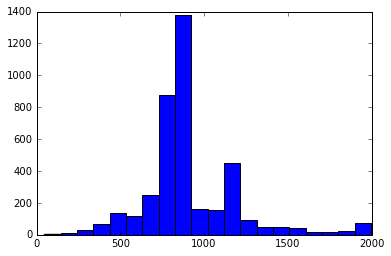

In [33]:
lengths = []
with open(amr_db_fname) as handle:
    for seq in Bio.SeqIO.parse(handle, format="fasta"):
        lengths.append(len(seq))
plt.hist([l for l in lengths if l < 2000],bins=20)